<a href="https://colab.research.google.com/github/thetime50/colab-notebook/blob/main/machine-learning/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

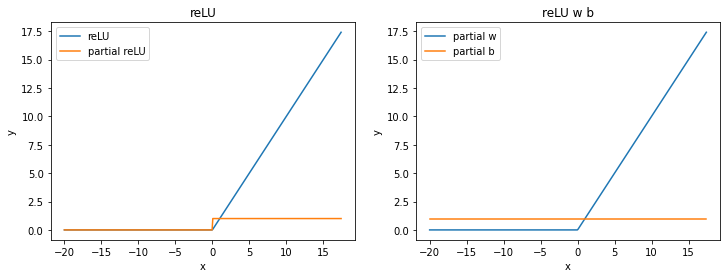

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random


class Fun:
  def __init__(self,fun,pFun,pwFun,pbFun):
    self.fun = fun
    self.pFun = pFun
    self.pwFun = pwFun
    self.pbFun = pbFun
  
def drawFun(title,f,start=-20,end=20,step=0.1):
  x = np.arange(start,end,step,np.float16)
  yr = [ f.fun(i) for i in x]
  ypr = [ f.pFun(i) for i in x]
  ypwr = [ f.pwFun(i) for i in x]
  ypbr = [ f.pbFun(i) for i in x]

  plt.figure(figsize=(6*2,4))
  plt.subplot(121)
  plt.plot(x, yr, label=title)
  plt.plot(x, ypr, label='partial '+title)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.title("{}".format(title))
  plt.subplot(122)
  plt.plot(x, ypwr, label='partial w')
  plt.plot(x, ypbr, label='partial b')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.title("{} w b".format(title))
  plt.show()

reLU = Fun( 
  (lambda x:x>0 and x or 0),
  (lambda x:x>0 and 1 or 0),
  (lambda x:x>0 and x or 0),
  (lambda x: 1)
)
drawFun('reLU',reLU)

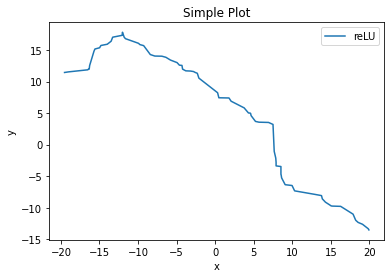

getLoss 40957718.413268074
PartialW,PartialB -931949.3921130206 -52725.936360537715


In [74]:
class Neurel:
  def __init__(self,w,b,f=reLU):
    self.w=w
    self.b=b
    self.f=f
  def fun(self,x):
    return self.f.fun(x) * self.w + self.b
  def pFun(self,x):
    return self.f.pFun(x) + self.w
  def pwFun(self,x):
    return self.f.pwFun(x)
  def pbFun(self,x):
    return self.f.pbFun(x)

network=Neurel(-100,200)
LEN = 80
# x= [random.random()*40-20 for x in range(LEN)]
# y= [random.random()*40-20 for x in range(LEN)]
# x.sort()
# y.sort(reverse=True)
# y = [(y[i]>12 and 24-y[i] or y[i])+6 for i in range(LEN)]
# print('x,y',x,y)
x = [-19.531139135448115, -19.029498881526337, -16.51352011991349, -16.437013417202785, -16.333902471786566, -16.27739063286213, -15.719719795174228, -15.59214138632628, -14.977661786084674, -14.922588137675712, -14.807903963535969, -13.995975207304326, -13.493999783936307, -13.291346225110455, -12.067515301303903, -12.021140261268034, -11.795820963637409, -11.62845763856434, -10.4152895219697, -9.941795525255138, -9.763247247990785, -9.274545372609794, -8.411833644348977, -7.828369124438993, -6.914958024594991, -6.394784261476062, -5.793763587450433, -4.944574698890207, -4.641387933160468, -4.3097657240224905, -4.228134390371924, -4.165375271395003, -3.8110936543161458, -3.197138905955633, -2.8117973722192957, -2.597822773537569, -2.3213573351918555, -2.1156962186038157, 0.31000077953655847, 0.4740218037198076, 1.7865154782027872, 2.059519709872877, 3.75734044123913, 3.829665960097696, 4.312577377772563, 4.502804579855578, 4.586257275547819, 4.655667634938197, 5.222313920220181, 5.67844113841354, 6.915368874209911, 7.4924769723818265, 7.649623057355704, 7.849888134182535, 7.885704247028386, 7.893407668270498, 7.893493709003149, 8.519949976508961, 8.521546127458272, 8.543523885822445, 8.61271298150708, 9.069625358688587, 9.962534502463086, 10.29526680489996, 12.900770209443685, 13.650413245855141, 13.780364526606718, 13.888223412804813, 14.290109330940922, 14.797551728600538, 15.041901874759162, 15.217660976513578, 16.263462059318414, 17.87261154729572, 18.158911533760865, 18.222575145074877, 18.527638684277953, 19.097407496412046, 19.83727090762727, 19.925130899836354]
y = [11.448447844295295, 11.541518220851373, 11.873049478845218, 11.978125307809385, 11.984070926455814, 12.552798498883185, 14.802346302993222, 15.169982841116912, 15.370826685486271, 15.510008776265146, 15.73251865937791, 15.926001601376669, 16.40279129409212, 17.044431837146128, 17.339991786862555, 17.82955575760382, 17.034314807310118, 16.807218952517538, 16.280441961499495, 16.072371506073505, 15.871535176794964, 15.705471098399599, 14.290338929810765, 14.053601378168512, 14.030767131659147, 13.856929248175138, 13.41307459385538, 13.013298963844719, 12.608055433117098, 12.568594967886064, 11.971827711748649, 11.932862528509688, 11.707940791455101, 11.67423530327002, 11.596749721305567, 11.453925008245086, 11.32453744455664, 10.553156864423862, 8.236302184696498, 7.435357630483075, 7.403912611353597, 6.893324275556626, 5.830012584304889, 5.719958731055218, 5.026076988287052, 5.01313042422516, 4.964101897429366, 4.60014335088627, 3.6851400258208713, 3.5634454860608216, 3.5239313564189167, 3.207071163080844, -1.06674038064428, -2.1290639834493117, -2.681650429407801, -2.850896811378263, -3.3670204418355585, -3.4689051788717435, -4.7228210022033785, -4.77163033184943, -5.277332082660596, -6.349747281585701, -6.4797692934034785, -7.327582738825491, -7.881758849299267, -8.04929168548664, -8.086072410063961, -8.59965767406835, -9.121671236729068, -9.52019874372557, -9.721010215269025, -9.744834423610094, -9.785305596530254, -11.024228181506544, -11.838312394451709, -12.0019423767855, -12.334069218141792, -12.626974501501365, -13.335929145164691, -13.522225006964256]

class Data:
  def __init__(self,x,y):
    self.x = x
    self.y = y
data = Data(x,y)#[[x[i],y[i]] for i in range(LEN)]

plt.plot(x, y, label='reLU')

plt.xlabel('x')
plt.ylabel('y')

plt.title("Simple Plot")

plt.legend()

plt.show()

def getLoss(nw,data):
  sq = [(data.y[i] - nw.fun(data.x[i]))**2 for i in range(len(data.x))]
  return sum(sq)

print('getLoss' ,getLoss(network,data))

def getPartialW(nw,data):
  getPwi = lambda x,y: 2*(y-nw.fun(x))*-nw.pwFun(x)
  return sum([getPwi(data.x[i], data.y[i], ) for i in range(len(data.x))])
def getPartialB(nw,dat):
  # def getPbi(x,y):
  getPbi = lambda x,y: 2*(y-nw.fun(x))*-nw.pbFun(x)
  return sum([getPbi(data.x[i], data.y[i], ) for i in range(len(data.x))])

print('PartialW,PartialB',
  getPartialW(network,data ),
  getPartialB(network,data )
)

def getResolutData(fun,xaxis):
  return [fun(xaxis[i]) for i in range(len(xaxis))]
import math
from matplotlib import cm
def drawGradient(axe,Nr,nw,data,xs,ys,gdRes,zoom=2,step=1,log=False): # w / b
  # 6:4
  xc=nw.w
  yc=nw.b
  # print(getLoss(Neurel(xc,yc),data),getLoss(Neurel(math.ceil(xc),math.ceil(yc)),data))
  dx=abs(xs-xc)
  dy=abs(ys-yc)
  x2y = 4*dx/6
  y2x = 6*dy/4
  if dx<y2x: dx = y2x
  if dy<x2y: dy = x2y
  dx= math.ceil(dx*zoom)
  dy= math.ceil(dy*zoom)

  xStaet = xc-dx
  xEnd = xc+dx
  yStaet = yc-dy
  yEnd = yc+dy

  xrange = np.arange(xStaet, xEnd, step)
  yrange = np.arange(yStaet, yEnd, step)
  # print(xrange,yrange)
  if log:
    z = np.array([[np.log2(getLoss(Nr(x,y),data)) for x in xrange] for y in yrange])
  else:
    z = np.array([[getLoss(Nr(x,y),data) for x in xrange] for y in yrange])
  
  plt.xlabel('w')
  plt.ylabel('b')
  plt.imshow(z,extent=[xStaet,xEnd,yStaet,yEnd],cmap=cm.autumn)#plasma autumn 
  xCenter = z[:,math.floor(len(xrange)/2)]
  yCenter = z[math.floor(len(yrange)/2)]
  ct = z[math.floor(len(yrange)/2),math.floor(len(xrange)/2)]
  for i in range(len(gdRes['w'])):
    axe.plot(gdRes['w'][i], gdRes['b'][i], '.b', alpha=.6)
    axe.plot(gdRes['w'][i], gdRes['b'][i], '-b', alpha=.3)
  # print('center loss {:.4f} {:.4f} {:.4f} {:.4f} {:.4f} {:.4f}'.format(
  #   getLoss(Neurel(xc,yc),data),ct,xCenter[0],xCenter[-1],yCenter[0],yCenter[-1]
  # ))
  # print(z[math.floor(len(yrange)/2)-1:math.floor(len(yrange)/2)+2,math.floor(len(xrange)/2)-1:math.floor(len(xrange)/2)+2])

def drawGraph(title,data,xaxis,Nr,nw,ws,bs,gdRes,zoom=2,step=1,drawGra=True):
  print('{} w:{:.4f} b:{:.4f} loss:{:.4f}'.format(title,nw.w,nw.b,getLoss(nw,data)))
  y = getResolutData(nw.fun,xaxis)
  # plt.figure(figsize=(6*3,4))
  fig, axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True,figsize=(6*3,4))# figsize=(10, 5)
  # fig, axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True,figsize=(4*3,3))# figsize=(10, 5)
  # fig, axes = plt.subplot(131)
  axes[0].set_title('{}-data'.format(title))
  axes[0].plot(xaxis,y,label='data')
  axes[0].plot(data.x,data.y,label='fun')
  # plt.subplot(132)
  axes[1].set_title('{}-loss'.format(title))
  axes[1].plot(range(len(gdRes['loss'])),gdRes['loss'],label='loss')
  # plt.subplot(133)
  drawGra and drawGradient(axes[2],Nr,nw,data,ws,bs,gdRes,zoom,step)
  plt.show()


In [3]:

weightStart = -100
biasStart = 80
# weightStart = -100
# biasStart = -120
xaxis = np.array(range(-200,200,1),np.float16)/10
# gradientDescent(network,data)

ETA = 0.00002

In [4]:

# 固定学习率的梯度下降
def gradientDescent(nw,data):
  eta=ETA
  for i in range(500):
    pw=getPartialW(nw,data )
    pb=getPartialB(nw,data )
    nw.w = nw.w - eta*pw
    nw.b = nw.b - eta*pb
    i%20 == 0 and print(i,'getLoss' ,pw,getLoss(network,data))

# 根据和梯度滤波值的差调整学习率的梯度下降
newRate = 0.2
def gradientDescent1(nw,data):
  eta=ETA
  pwf = getPartialW(nw,data )
  pbf = getPartialB(nw,data )
  for i in range(500):
    pw=getPartialW(nw,data )
    pb=getPartialB(nw,data )
    nw.w = nw.w - eta*pw
    nw.b = nw.b - eta*pb # (pb-pbf)/pbf
    i%20 == 0 and print(i,'getLoss' ,getLoss(network,data))
    pwf = (1-newRate)*pwf + newRate*pw
    pbf = (1-newRate)*pbf + newRate*pb

# Adagrad
def gradientDescentAdagrad(nw,data,eta=ETA,type=0,epoch=100):
  sumSqW = 0
  sumSqB = 0
  loss = []
  w=[]
  b=[]
  w.append(nw.w)
  b.append(nw.b)
  loss.append(getLoss(nw,data))
  for i in range(epoch):
    pw=getPartialW(nw,data )
    pb=getPartialB(nw,data )
    sumSqW = sumSqW + pw**2
    sumSqB = sumSqB + pb**2
    # print(i,'w:{:.4f} b:{:.4f} pw:{:.4f} pb:{:.4f}'.format(nw.w,nw.b,pw,pb))
    if type==0: # 不随时间衰减
      nw.w = nw.w - eta*pw/(sumSqW/(i+1))**0.5
      nw.b = nw.b - eta*pb/(sumSqB/(i+1))**0.5
    elif type==1: # 随时间衰减
      # i%20 == 0 and print(eta*pb/sumSqB**0.5)
      nw.w = nw.w - eta*pw/sumSqW**0.5
      nw.b = nw.b - eta*pb/sumSqB**0.5
    w.append(nw.w)
    b.append(nw.b)
    l=getLoss(nw,data)
    loss.append(l)
    # i%20 == 0 and print(i,'getLoss {:.4f} {:.4f} {:.4f}'.format( l,pb,(sumSqB/(i+1))**0.5))
    # print(i,'getLoss {:.4f} | {:.4f} {:.4f} {:.4f} | {:.4f} {:.4f} {:.4f}'.format( l,nw.w,pw,eta*pb/sumSqB**0.5,nw.w,pb,(sumSqB/(i+1))**0.5))
    # print(i,l,nw.b,eta,pb,sumSqB**0.5)
  return {
    'loss':loss,
    'w':w,
    'b':b,
  }


Adagrad-notime w:-1.5124 b:12.7825 loss:576.8881


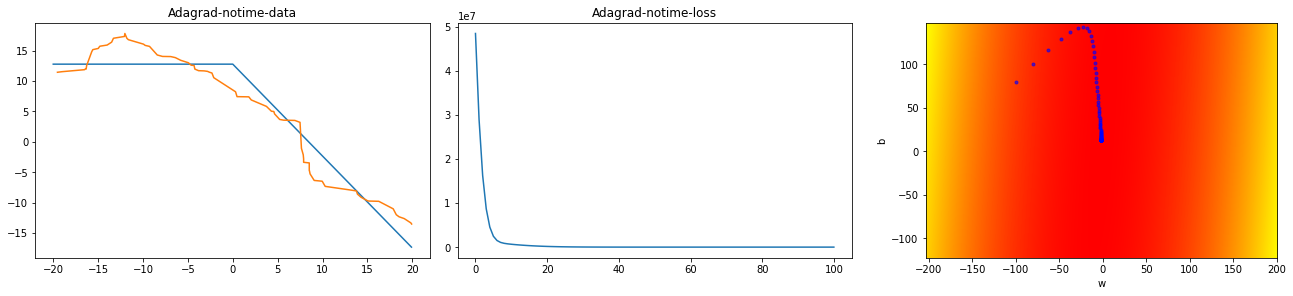

Adagrad w:-1.5437 b:13.1493 loss:583.4613


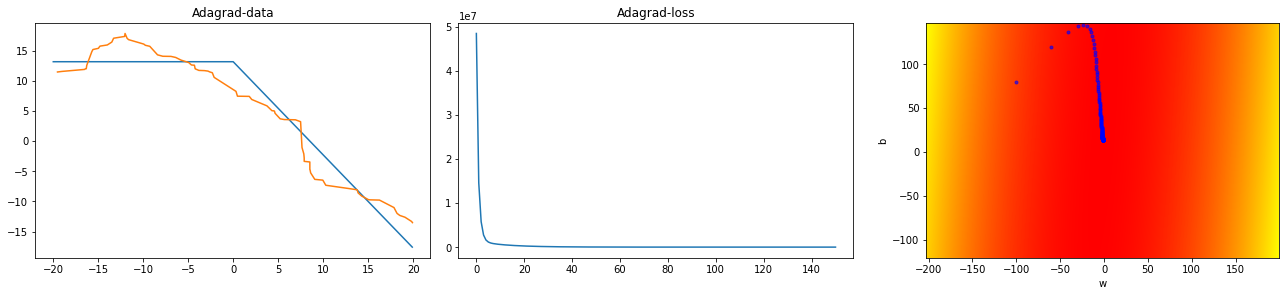

In [22]:

nwAdagradNt=Neurel(weightStart,biasStart)
nwAdagrad=Neurel(weightStart,biasStart)
graAdagradNt = gradientDescentAdagrad(nwAdagradNt,data,ETA*1000000,0)
graAdagrad = gradientDescentAdagrad(nwAdagrad,data,ETA*1000000*2,1,150)


# print(plt.rcParams["figure.figsize"])
# plt.rcParams["figure.figsize"] = (12, 9) # (w, h)
drawGraph('Adagrad-notime',data,xaxis,Neurel,nwAdagradNt,weightStart,biasStart,graAdagradNt)
drawGraph('Adagrad',data,xaxis,Neurel,nwAdagrad,weightStart,biasStart,graAdagrad)


2170.1036882171666


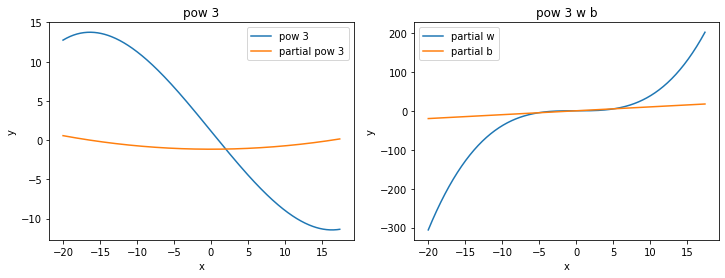

Adagrad w:0.1124 b:-1.1504 loss:2171.7253


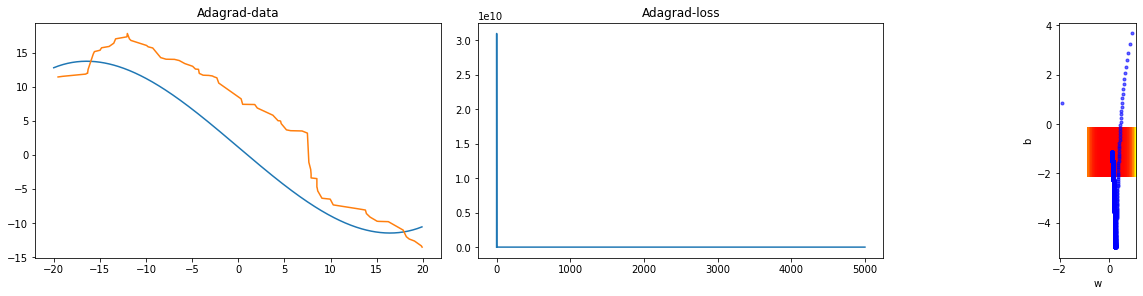

In [31]:
class P3Neurel:
  def __init__(self,w,b):
    self.w=w
    self.b=b
  def fun(self,x):
    return (self.b + self.w*x)**3
  def pFun(self,x):
    return 3*(self.b + self.w*x)**2*self.w
  def pwFun(self,x):
    return 3*(self.b + self.w*x)**2*x
  def pbFun(self,x):
    return 3*(self.b + self.w*x)**2
class P3Neurel1:
  def __init__(self,w,b):
    self.w=w
    self.b=b
  def fun(self,x):
    return (x*self.w)**3 + (x-1)*self.b
  def pFun(self,x):
    return 3*(x*self.w)**2*self.w + self.b
  def pwFun(self,x):
    return 3*(x*self.w)**2*x
  def pbFun(self,x):
    return x
# p3nw = P3Neurel1(weightStart,biasStart)
# tw=0.7
# tb=-15
# tw=0.1116
# tb=-1.1436
tw=0.1129
tb=-1.1554

p3nw = P3Neurel1(tw,tb)
print(getLoss(p3nw,data))
drawFun('pow 3',p3nw,)
p3nwGraAdagrad = gradientDescentAdagrad(p3nw,data,ETA*100000,0,5000)
# Adagrad w:0.1123 b:-1.1239 loss:1208.0881
# Adagrad w:0.1396 b:-1.3397 loss:1404.3045
# print(getLoss(p3nw,data))
# drawGraph('pow 3 adagrad',data,xaxis,Neurel,p3nw,weightStart,biasStart,p3nwGraAdagrad,)

drawGraph('Adagrad',data,xaxis,P3Neurel1,p3nw,tw,tb,p3nwGraAdagrad,1.1,0.1)



6099.3725632812975


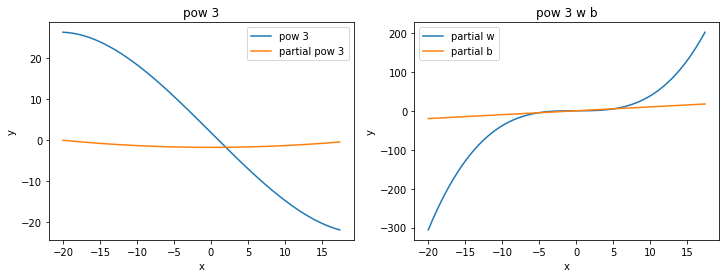

Adagrad time w:0.1225 b:-1.2838 loss:2155.3900


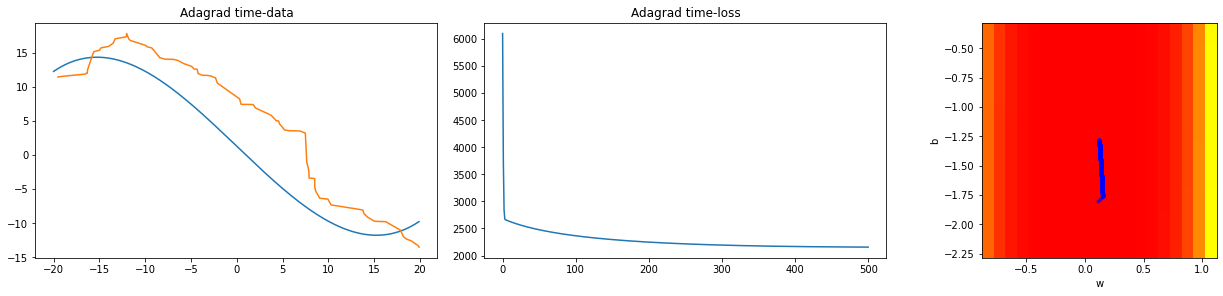

In [55]:

tw=0.1129
tb=-1.8
p3nw = P3Neurel1(tw,tb)
print(getLoss(p3nw,data))
drawFun('pow 3',p3nw,)
p3nwGraAdagrad = gradientDescentAdagrad(p3nw,data,ETA*1000,1,500)
# Adagrad w:0.1123 b:-1.1239 loss:1208.0881
# Adagrad w:0.1396 b:-1.3397 loss:1404.3045
# print(getLoss(p3nw,data))
# drawGraph('pow 3 adagrad',data,xaxis,Neurel,p3nw,weightStart,biasStart,p3nwGraAdagrad,)

drawGraph('Adagrad time',data,xaxis,P3Neurel1,p3nw,tw,tb,p3nwGraAdagrad,1.1,0.1)

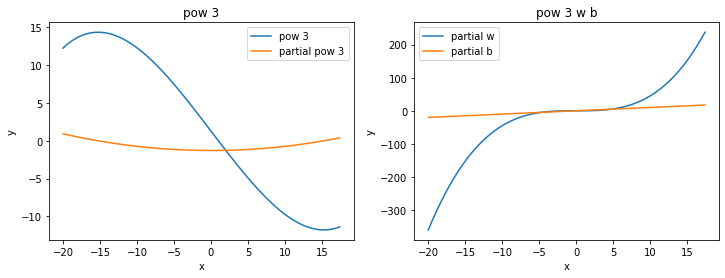

-4.047584565537477e-05 -0.8172749510673278
-3.738057256953989e-05 -0.8193784873552499
-3.735930716395458e-05 -0.8991124927212001
-3.6144568916671204e-05 -1.0268588438969806
-3.416396731922432e-05 -0.8191692773180762
p3 Adagrad w:-0.0000 b:-0.8192 loss:2526.6254


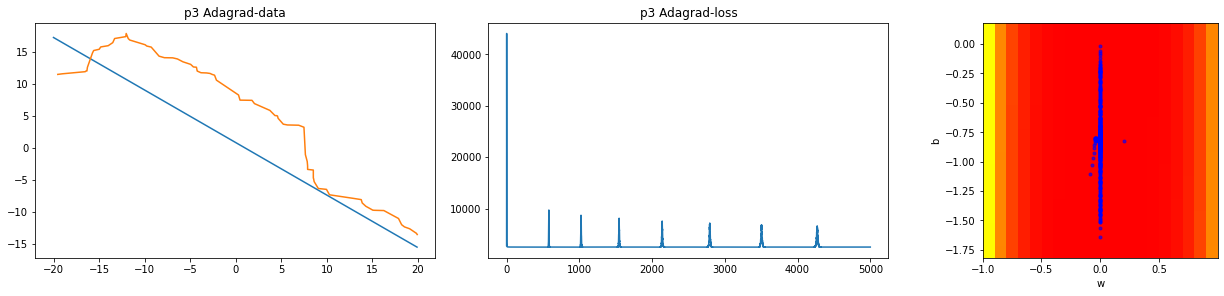

In [56]:
tw=0.1225 
tb=-1.2838
# tw=-3.416396731922432e-05 
# tb=-0.8191692773180762
p3nw = P3Neurel1(tw,tb)
drawFun('pow 3',p3nw,)
for i in range(5):
  p3nwGraAdagrad = gradientDescentAdagrad(p3nw,data,ETA*10000,0,5000)
  print(p3nw.w,p3nw.b)
drawGraph('p3 Adagrad',data,xaxis,P3Neurel1,p3nw,tw,tb,p3nwGraAdagrad,1.1,0.1)

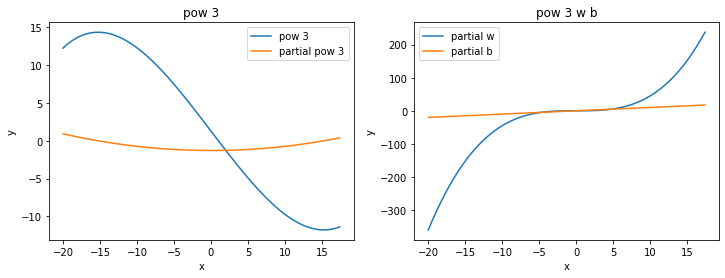

-0.00012163651345574649 -0.8172748937115397
-0.00011224225565890006 -0.8172748938025348
-0.00010419692516123587 -0.8172748938688524
-9.722920884434766e-05 -0.8172748939185907
-9.113602331356885e-05 -0.8172748939566254
p3 Adagrad t w:-0.0001 b:-0.8173 loss:2527.9253


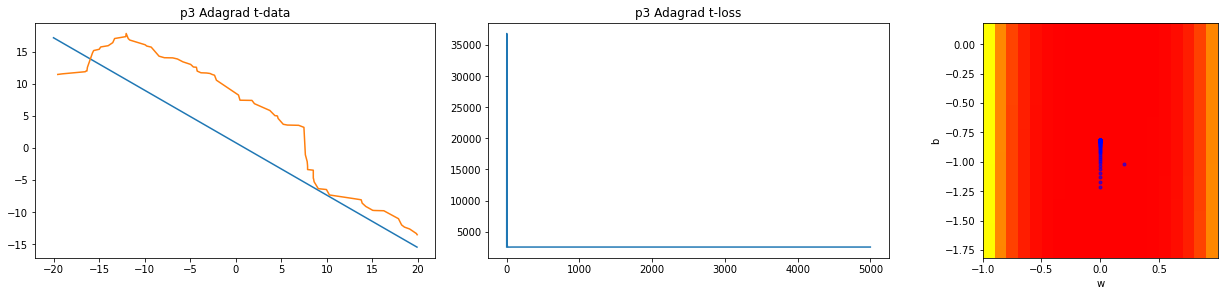

In [59]:

p3nw = P3Neurel1(tw,tb)
drawFun('pow 3',p3nw,)
for i in range(5):
  p3nwGraAdagrad = gradientDescentAdagrad(p3nw,data,ETA*10000,1,5000)
  print(p3nw.w,p3nw.b)
drawGraph('p3 Adagrad t',data,xaxis,P3Neurel1,p3nw,tw,tb,p3nwGraAdagrad,1.1,0.1)
# 线性模型学习非线性数据有时候太敏感 有时候又卡在局部最优解(可能参数在一些地方对数据不敏感 也可能是因为维度太少的关系)

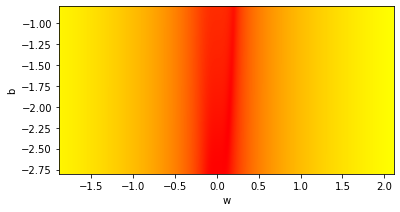

In [77]:

drawGradient(xaxis,P3Neurel1,P3Neurel1(0.1129,-1.8),data,0,-1,{'w':[],'b':[]},1.1,0.01,log=True) # w / b

[[-0.00067093 -0.0007195  -0.00077089 ...  0.00077089  0.0007195
   0.00067093]
 [-0.0007268  -0.00077942 -0.00083509 ...  0.00083509  0.00077942
   0.0007268 ]
 [-0.0007867  -0.00084365 -0.00090391 ...  0.00090391  0.00084365
   0.0007867 ]
 ...
 [-0.0007867  -0.00084365 -0.00090391 ...  0.00090391  0.00084365
   0.0007867 ]
 [-0.0007268  -0.00077942 -0.00083509 ...  0.00083509  0.00077942
   0.0007268 ]
 [-0.00067093 -0.0007195  -0.00077089 ...  0.00077089  0.0007195
   0.00067093]] [-2.0, 2.0, -2.0, 2.0]


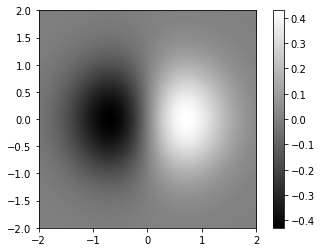

In [9]:
#func2d.py
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

y,x = np.ogrid[-2:2:200j,-2:2:200j]
z = x * np.exp(-x**2-y**2)
extent = [np.min(x),np.max(x),np.min(y),np.max(y)]
print(z,extent)
plt.imshow(z,extent=extent,cmap=cm.gray)
plt.colorbar()
plt.show()